In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

- logistic (sigmoid) : σ(z) = 1 / (1 + e^(-z))

#### Binary Classification

In [6]:
x, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=42)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

In [8]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
y_pred = model.predict(x_test_scaled)
y_pred_proba = model.predict_proba(x_test_scaled)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.885

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       101
           1       0.90      0.86      0.88        99

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.89      0.88       200



In [13]:
print("\nFirst 5 predictions with probabilities:")
for i in range(5):
    print(f"Sample {i+1}: Predicted={y_pred[i]}, "
          f"Prob(Class 0)={y_pred_proba[i][0]:.3f}, "
          f"Prob(Class 1)={y_pred_proba[i][1]:.3f}")


First 5 predictions with probabilities:
Sample 1: Predicted=1, Prob(Class 0)=0.178, Prob(Class 1)=0.822
Sample 2: Predicted=1, Prob(Class 0)=0.138, Prob(Class 1)=0.862
Sample 3: Predicted=0, Prob(Class 0)=0.900, Prob(Class 1)=0.100
Sample 4: Predicted=0, Prob(Class 0)=0.903, Prob(Class 1)=0.097
Sample 5: Predicted=0, Prob(Class 0)=0.699, Prob(Class 1)=0.301


#### Multiclass Classification

In [16]:
# Load Iris dataset (3 classes)
iris = load_iris()
x, y = iris.data, iris.target

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

In [18]:
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(x_train, y_train)

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [19]:
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Decision Boundary

In [22]:
x, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)

In [23]:
model = LogisticRegression()
model.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
# Plot decision boundary
h = 0.02
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

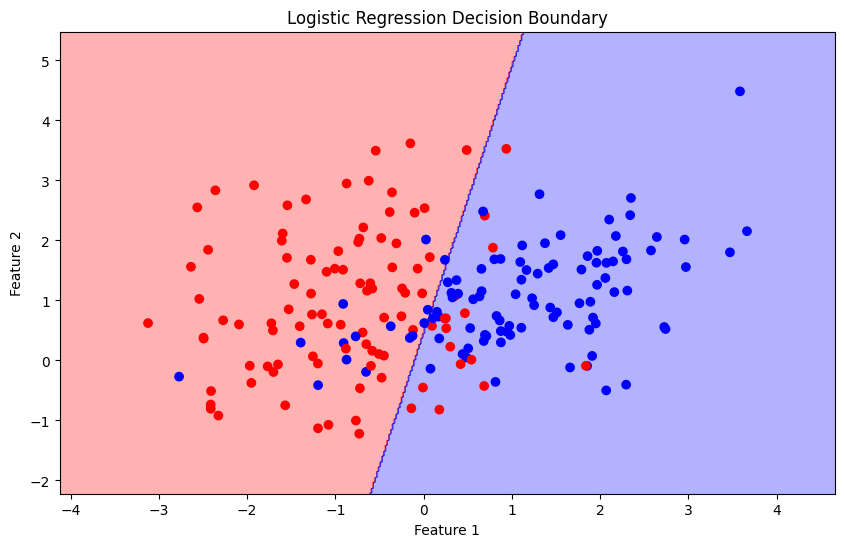

In [28]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'blue']))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=ListedColormap(['red', 'blue']))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()